## Logistic Regression Model Training using Sklearn

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pd.options.display.max_columns = None

In [215]:
#read in the csv file and setup the dataframe for training
df = pd.read_csv('NBA_train_data.csv')
data = shuffle(df)
data.fillna(0, inplace = True)
data = data.set_index(['Player'])
X = data.drop(['MVP'], axis = 1)

In [574]:
#setup only using the selected features
header = X.columns
new_features = ['Year','Age','GS','M_PER', 'PER', 'W/L%', 'WS', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_C']
drop_features = [column for column in headers if column not in new_features]
X_new = X.drop(drop_features, axis = 1)

In [585]:
#This code uses SMOTE to help oversample the minority class to rectify of the issue of not classifying any positive labels
#due to imbalanced issue

#splitting the training and test set
X_train = pd.DataFrame()
y_train = pd.DataFrame()
X_test = pd.DataFrame()
y_test = pd.DataFrame()

#all season from 2000 to 2012 will be used to train the model
for i in range(2000, 2013):
    X_train = pd.concat([X_train, X_new[X_new.Year == i]], axis = 0)
    y_train = pd.concat([y_train,data[X_new.Year == i].MVP], axis = 0)

#all seasons from 2013 to 2017 will be used to test the model
for j in range(2013, 2018):
    X_test = pd.concat([X_test, X_new[X_new.Year == j]], axis = 0)
    y_test = pd.concat([y_test, data[X_new.Year == j].MVP], axis = 0)

#using the SMOTE method to generate synthetic samples of the minority to rectify the skew in negative labels in the 
#imbalance dataset
sm = SMOTE(random_state = 42, ratio = 'minority')
sm.fit(X_train, y_train)
X_res, y_res = sm.sample(X_train, y_train)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [587]:
#verify the data is indeed balanced
count_0 = 0
count_1 = 0
for j in range(len(y_res)):
    if y_res[j] == 1:
        count_1 += 1
    else:
        count_0 += 1
count_0, count_1

(1287, 1287)

### Trying Linear Discriminate Analysis

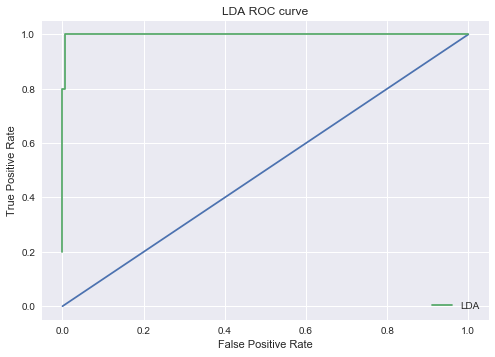

[[476  19]
 [  0   5]]
             precision    recall  f1-score   support

        0.0       1.00      0.96      0.98       495
        1.0       0.21      1.00      0.34         5

avg / total       0.99      0.96      0.97       500



In [726]:
#trying LDA algorithm for classification
lda = LinearDiscriminantAnalysis()
lda.fit(X_res,y_res)
lda_prob = lda.predict_proba(X_test)[:,1]
lda_pred = lda.predict(X_test)

#Plotting the roc curve
fpr, tpr, thresholds = roc_curve(y_test, lda_prob)

plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label ='LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC curve')
plt.legend()
plt.show()

#printing the classification report to see how well the model did
print(confusion_matrix(y_test, lda_pred))
print(classification_report(y_test, lda_pred))

In [579]:
a = []
#find the index of the players that were classified as MVP
for i in range(len(lda_pred)):
    if lda_pred[i] == 1:
        a.append(i)

#show the player stat line that were classified as MVP 
clf_mvps = pd.DataFrame()
for k in range(len(a)):
    clf_mvps = pd.concat([clf_mvps, X_test.reset_index().loc[[a[k]]]], axis = 0)

clf_mvps

,Player,Year,Age,GS,M_PER,PER,W/L%,WS,Pos_C,Pos_PF,Pos_PG,Pos_SF
63,LeBron James,2013.0,28,76,18.729327,31.6,0.805,19.3,0,1,0,0
78,Mike Conley,2013.0,25,80,5.429327,18.3,0.683,9.9,0,0,1,0
118,Goran Dragic,2014.0,27,75,8.379137,21.4,0.585,10.3,0,0,0,0
128,Kevin Love,2014.0,25,77,13.879137,26.9,0.488,14.3,0,1,0,0
149,Stephen Curry,2014.0,25,78,11.079137,24.1,0.622,13.4,0,0,1,0
173,Kevin Durant,2014.0,25,81,16.779137,29.8,0.720,19.2,0,0,0,1
207,Anthony Davis,2015.0,21,68,17.643750,30.8,0.549,14.0,0,1,0,0
219,Stephen Curry,2015.0,26,80,14.843750,28.0,0.817,15.7,0,0,1,0
258,James Harden,2015.0,25,81,13.543750,26.7,0.683,16.4,0,0,0,0
323,DeAndre Jordan,2016.0,27,77,7.039437,20.6,0.646,11.5,1,0,0,0


In [581]:
weights = list(zip(np.squeeze(lda.coef_),new_features))
dw = pd.DataFrame(weights)
dw.sort_values(by=0)

,0,1
7,-4.309250,Pos_PF
10,-3.836668,Pos_C
8,-3.664409,Pos_PG
4,-2.550597,PER
2,-0.054621,GS
1,0.131916,Age
0,0.133408,Year
9,1.552733,Pos_SF
6,2.112080,WS
3,2.561982,M_PER


### Using Leave One Out method on all seasons to test method of taking the highest probability as MVP

In [171]:
#this loop will train multiple models to classify an mvp for each season. Each season will become the test set once.
#The player with the highest probability predicted with the model will be considered the MVP for the season.
mvp_pred = []

for i in range (2000, 2018):
    LOOX_train = X[X.Year != i]
    LOOy_train = data[X.Year != i].MVP
    LOOX_test = X[X.Year == i]
    LOOy_test = data[X.Year == i].MVP
    
    c_space = np.logspace(-5,8,15)
    params = {'C':c_space, 'penalty':['l1','l2']}
    logreg = LogisticRegression()
    logreg_cv = GridSearchCV(logreg, params, cv = 5)
    logreg_cv.fit(LOOX_train, LOOy_train)
    
    logreg = LogisticRegression(C = logreg_cv.best_params_['C'], penalty = logreg_cv.best_params_['penalty'])
    logreg.fit(LOOX_train, LOOy_train)
    y_prob = logreg.predict_proba(LOOX_test)[:, 1]
    idx = np.argmax(y_prob)
    mvp_pred.append((i, LOOy_test.reset_index().loc[idx].Player))

In [174]:
#retrieve the model classifed MVP player statline
clf_mvp_stat = pd.DataFrame()

for i in range(len(mvp_pred)):
    clf_mvp_stat = pd.concat([clf_mvp_stat, df[(df.Player == mvp_pred[i][1]) & (df.Year == mvp_pred[i][0])] ], axis = 0)

clf_mvp_stat.loc[:, ['Player','Year','Age', 'PER', 'M_PER', 'WS', 'W/L%']]

,Player,Year,Age,PER,M_PER,WS,W/L%
1782,Shaquille O'Neal*,2000.0,27,30.6,17.953285,18.6,0.817
175,Tracy McGrady,2001.0,21,24.9,12.258376,12.2,0.524
1784,Tim Duncan,2002.0,25,27.0,14.195122,17.8,0.707
377,Dirk Nowitzki,2003.0,24,25.6,13.056608,16.1,0.732
1786,Kevin Garnett,2004.0,27,29.4,16.863904,18.3,0.707
555,LeBron James,2005.0,20,25.7,12.833086,14.3,0.512
1788,Steve Nash,2006.0,31,23.3,10.738424,12.4,0.659
1789,Dirk Nowitzki,2007.0,28,27.6,15.218881,16.3,0.817
1790,Kobe Bryant,2008.0,29,24.2,10.955759,13.8,0.695
1791,LeBron James,2009.0,24,31.7,18.473404,20.3,0.805


In [534]:
#create a list of actual MVP players
MVP_list = data[data.MVP == 1].sort_values('Year')
MVP_list = MVP_list.loc[:,['Year','Age', 'PER', 'M_PER', 'WS', 'W/L%']]
MVP_list.reset_index()

,Player,Year,Age,PER,M_PER,WS,W/L%
0,Shaquille O'Neal*,2000.0,27,30.6,17.953285,18.6,0.817
1,Allen Iverson*,2001.0,25,24.0,11.358376,11.8,0.683
2,Tim Duncan,2002.0,25,27.0,14.195122,17.8,0.707
3,Tim Duncan,2003.0,26,26.9,14.356608,16.5,0.732
4,Kevin Garnett,2004.0,27,29.4,16.863904,18.3,0.707
5,Steve Nash,2005.0,30,22.0,9.133086,10.9,0.756
6,Steve Nash,2006.0,31,23.3,10.738424,12.4,0.659
7,Dirk Nowitzki,2007.0,28,27.6,15.218881,16.3,0.817
8,Kobe Bryant,2008.0,29,24.2,10.955759,13.8,0.695
9,LeBron James,2009.0,24,31.7,18.473404,20.3,0.805


### Training the model using Logistic Regression using selected features

C: 268.2695795279727 penalty: l1


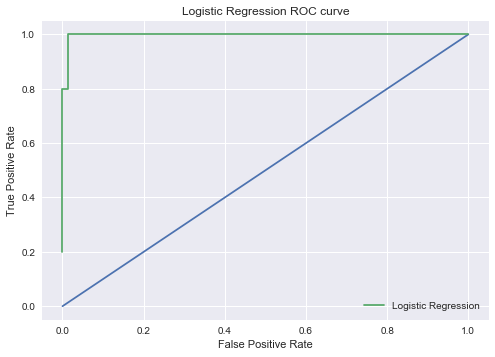

[[488   7]
 [  0   5]]
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99       495
        1.0       0.42      1.00      0.59         5

avg / total       0.99      0.99      0.99       500



In [824]:
#setup the gridsearchcv to help find the best hyperparameters to train the model
c_space = np.logspace(-5,8,15)
params = {'C':c_space, 'penalty':['l1','l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, params, cv = 5)
logreg_cv.fit(X_res, y_res)

#train model using the best parameters determine from GridSearchCV
logreg = LogisticRegression(C = logreg_cv.best_params_['C'], penalty = logreg_cv.best_params_['penalty'])
logreg.fit(X_res, y_res)
y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict(X_test)

print("C: {}".format(logreg_cv.best_params_['C']), "penalty: {}" .format(logreg_cv.best_params_['penalty']))

#Plotting the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label ='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

#printing the classification report to see how well the model did
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [825]:
#printing the training and testing AUC Score and accuracy to see if the model overfitted
print('Training AUC Score: {}'.format(roc_auc_score(y_res, logreg.predict(X_res))))
print('Testing AUC Score: {}'.format(roc_auc_score(y_test, y_prob)))
print('Training Accuracy: {}'.format(logreg.score(X_res, y_res)))
print('Testing Accuracy: {}'.format(logreg.score(X_test, y_test)))

Training AUC Score: 0.9965034965034966
Testing AUC Score: 0.9971717171717172
Training Accuracy: 0.9965034965034965
Testing Accuracy: 0.986


In [826]:
a = []
#find the index of the players that were classified as MVP
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a.append(i)

#show the player stat line that were classified as MVP 
clf_mvps = pd.DataFrame()
for k in range(len(a)):
    clf_mvps = pd.concat([clf_mvps, X_test.reset_index().loc[[a[k]]]], axis = 0)

clf_mvps

,Player,Year,Age,GS,M_PER,PER,W/L%,WS,Pos_C,Pos_PF,Pos_PG,Pos_SF
63,LeBron James,2013.0,28,76,18.729327,31.6,0.805,19.3,0,1,0,0
173,Kevin Durant,2014.0,25,81,16.779137,29.8,0.720,19.2,0,0,0,1
219,Stephen Curry,2015.0,26,80,14.843750,28.0,0.817,15.7,0,0,1,0
258,James Harden,2015.0,25,81,13.543750,26.7,0.683,16.4,0,0,0,0
340,Klay Thompson,2016.0,25,80,5.039437,18.6,0.890,8.0,0,0,0,0
374,Stephen Curry,2016.0,27,79,17.939437,31.5,0.890,17.9,0,0,1,0
399,Chris Paul,2016.0,30,74,12.639437,26.2,0.646,12.7,0,0,1,0
401,Russell Westbrook,2017.0,28,81,17.512702,30.6,0.573,13.1,0,0,1,0
435,James Harden,2017.0,27,81,14.212702,27.3,0.671,15.0,0,0,1,0
440,Kevin Durant,2017.0,28,62,14.512702,27.6,0.817,12.0,0,0,0,1


In [572]:
#trying to see which features were denoted as a high predictor of the target variable
weights = list(zip(np.squeeze(logreg.coef_),new_features))
dw = pd.DataFrame(weights, columns = ['Coefficient', 'Feature'])
dw.sort_values(by='Coefficient')

,Coefficient,Feature
7,-16.023457,Pos_PF
8,-11.019461,Pos_PG
10,-5.965631,Pos_C
4,-1.541655,PER
9,-0.817547,Pos_SF
0,-0.022272,Year
2,0.051661,GS
1,0.487620,Age
6,1.531537,WS
3,2.402897,M_PER


### Final Model trained to predict 2018 NBA MVP

This code here will be used to help classify 2018 NBA season MVP. The training data will be all the current data
with the NBA 2018 season players being the test data.

In [851]:
#Using SMOTE to balance all the training data
y_new = data.MVP
smote = SMOTE(random_state = 42, ratio = 'minority')
smote.fit(X_new, y_new)
X_sam, y_sam = smote.sample(X_new, y_new)

In [860]:
#read in the test data
df_test = pd.read_csv('NBA_2018_test.csv')
df_test = df_test.drop(drop_features, axis = 1)
df_test = df_test.set_index('Player')
df_test = df_test[df_test.GS > 20]
df_test = df_test[['Year','Age','GS','M_PER', 'PER', 'W/L%', 'WS','Pos_C','Pos_PF','Pos_PG','Pos_SF']]
df_test.head()

,Year,Age,GS,M_PER,PER,W/L%,WS,Pos_C,Pos_PF,Pos_PG,Pos_SF
Player,,,,,,,,,,,
Steven Adams,2018,24.0,72.0,7.982759,21.0,0.577,9.4,1,0,0,0
LaMarcus Aldridge,2018,32.0,70.0,11.882759,24.9,0.584,10.2,1,0,0,0
Al-Farouq Aminu,2018,27.0,62.0,-0.517241,12.5,0.623,4.2,0,1,0,0
Kyle Anderson,2018,24.0,63.0,2.782759,15.8,0.584,5.8,0,0,0,1
Ryan Anderson,2018,29.0,50.0,-0.417241,12.6,0.805,4.7,0,1,0,0


In [854]:
#setup the gridsearchcv to help find the best hyperparameters to train the model
c_space = np.logspace(-5,8,15)
params = {'C':c_space, 'penalty':['l1','l2']}
logreg1 = LogisticRegression()
logreg_cv1 = GridSearchCV(logreg1, params, cv = 5)
logreg_cv1.fit(X_sam, y_sam)

#train model using the best parameters determine from GridSearchCV
logreg1 = LogisticRegression(C = logreg_cv1.best_params_['C'], penalty = logreg_cv1.best_params_['penalty'])
logreg1.fit(X_sam, y_sam)
y_prob = logreg1.predict_proba(df_test)[:,1]
y_pred = logreg1.predict(df_test)

LogisticRegression(C=268.26957952797272, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [861]:
y_prob = logreg1.predict_proba(df_test)[:,1]
y_pred = logreg1.predict(df_test)

In [862]:
a = []
#find the index of the players that were classified as MVP
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a.append(i)

#show the player stat line that were classified as MVP 
clf_mvps = pd.DataFrame()
for k in range(len(a)):
    clf_mvps = pd.concat([clf_mvps, df_test.reset_index().loc[[a[k]]]], axis = 0)

clf_mvps

,Player,Year,Age,GS,M_PER,PER,W/L%,WS,Pos_C,Pos_PF,Pos_PG,Pos_SF
37,Stephen Curry,2018,29.0,51.0,15.182759,28.2,0.727,9.2,0,0,1,0
65,James Harden,2018,28.0,68.0,16.782759,29.8,0.805,14.5,0,0,0,0
118,Chris Paul,2018,32.0,54.0,11.582759,24.6,0.805,9.6,0,0,1,0


In [863]:
idx = np.argmax(y_prob)
df_test.reset_index().loc[idx].Player

'James Harden'

In [866]:
#trying to see which features were denoted as a high predictor of the target variable
weights = list(zip(np.squeeze(logreg1.coef_),new_features))
dw = pd.DataFrame(weights, columns = ['Coefficient', 'Feature'])
dw.sort_values(by='Coefficient')

,Coefficient,Feature
7,-11.627798,Pos_PF
10,-6.845703,Pos_C
8,-6.651933,Pos_PG
4,-1.453789,PER
9,-0.752636,Pos_SF
0,-0.013897,Year
2,0.050994,GS
1,0.366600,Age
6,1.027088,WS
3,2.148774,M_PER
